In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

file_path = "PT Ventures Spring 2024 - Tensile Data.xlsx"
header_row = 2
area = 0.0032 * 0.0123  #Area of tensile bars in meters squared
original_length = 0.057  #Gauge length of the tensile bars in meters
downsample_factor = 10  #Downsample factor***********************************************
marker_size = 2  #Marker size************************************************************
sheets = ["Sachet Control", "5050 Sachet PP", "4060 Sachet PP", "3070 Sachet PP", "2080 Sachet PP", "1090 Sachet PP", "PP Control"]

In [2]:
def calculate_stress(force, area):
    return force / area

def calculate_strain(displacement, original_length):
    return displacement / original_length
    
def process_and_plot_data(sheet_name, displacement_col, force_col, run_number, label):
    # Read the Excel file
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=header_row)

    # Extract displacement and force columns
    displacement_mm = df.iloc[:, displacement_col]  # displacement in mm
    force_kN = df.iloc[:, force_col]  # force in kN

    # Convert units to meters
    displacement = displacement_mm / 1000  # convert mm to meters
    force = force_kN * 1000  # convert kN to N

    # Calculate stress and strain
    stress = calculate_stress(force, area)
    strain = calculate_strain(displacement, original_length)

    # Print column indices being displayed
    print(f"{label}: Columns {displacement_col} and {force_col}")

    # Plot stress vs. strain for each run on a separate graph
    plt.plot(strain[::downsample_factor] * 100, stress[::downsample_factor], marker='o', markersize=marker_size, label=label)

Trial 1 - Sachet Control: Columns 1 and 2
Trial 2 - Sachet Control: Columns 6 and 7
Trial 3 - Sachet Control: Columns 11 and 12
Trial 4 - Sachet Control: Columns 16 and 17


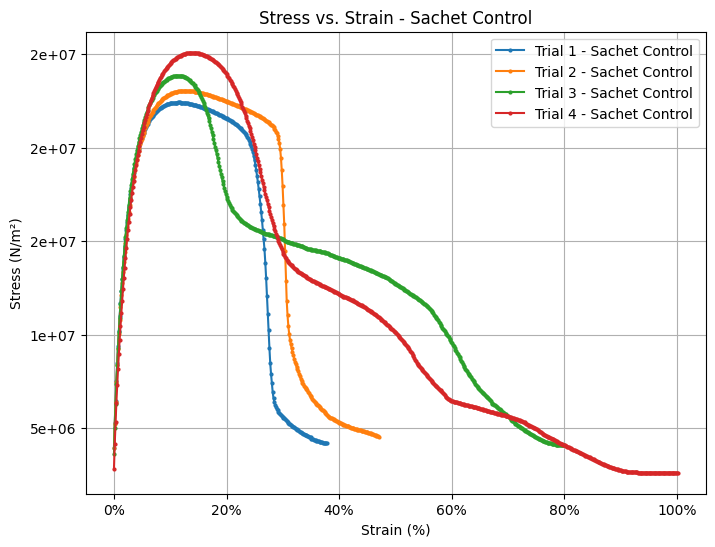

Trial 1 - 5050 Sachet PP: Columns 1 and 2
Trial 2 - 5050 Sachet PP: Columns 6 and 7
Trial 3 - 5050 Sachet PP: Columns 11 and 12
Trial 4 - 5050 Sachet PP: Columns 16 and 17


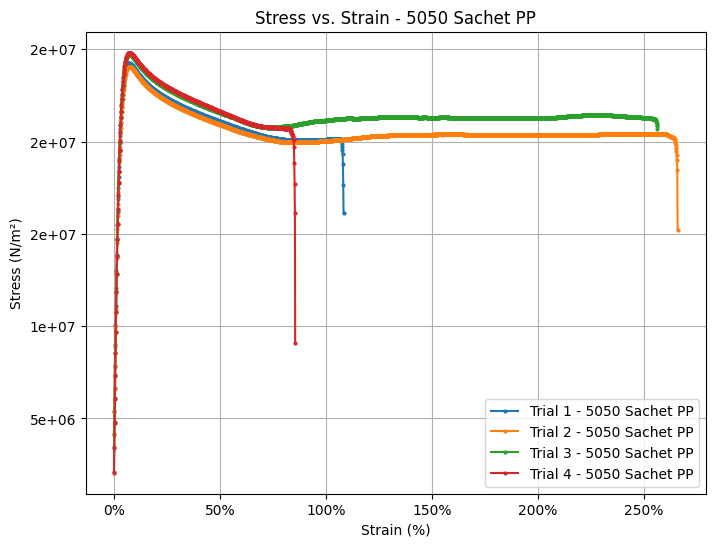

Trial 1 - 4060 Sachet PP: Columns 1 and 2
Trial 2 - 4060 Sachet PP: Columns 6 and 7
Trial 3 - 4060 Sachet PP: Columns 11 and 12
Trial 4 - 4060 Sachet PP: Columns 16 and 17


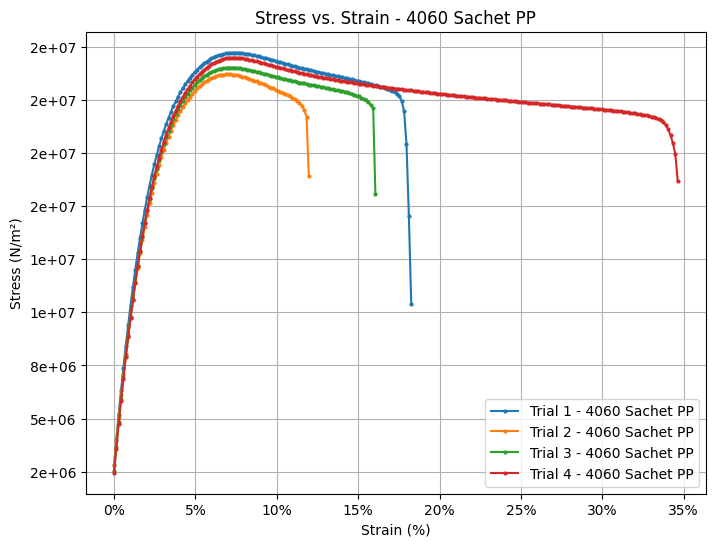

Trial 1 - 3070 Sachet PP: Columns 1 and 2
Trial 2 - 3070 Sachet PP: Columns 6 and 7
Trial 3 - 3070 Sachet PP: Columns 11 and 12
Trial 4 - 3070 Sachet PP: Columns 16 and 17


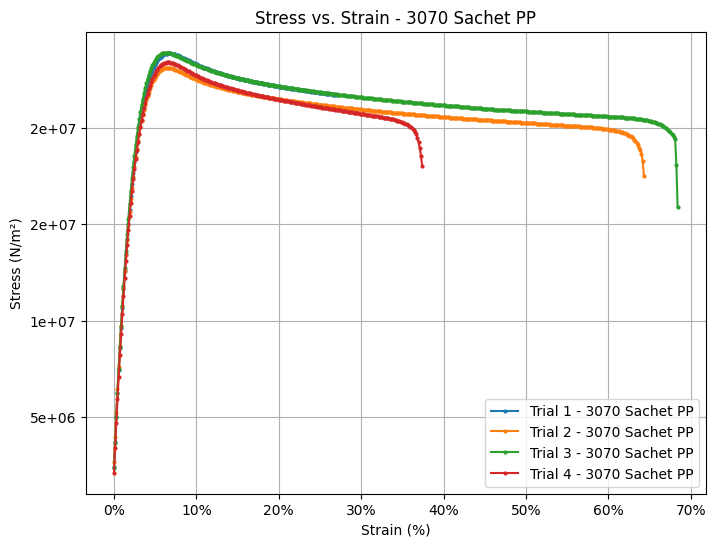

Trial 1 - 2080 Sachet PP: Columns 1 and 2
Trial 2 - 2080 Sachet PP: Columns 6 and 7
Trial 3 - 2080 Sachet PP: Columns 11 and 12
Trial 4 - 2080 Sachet PP: Columns 16 and 17


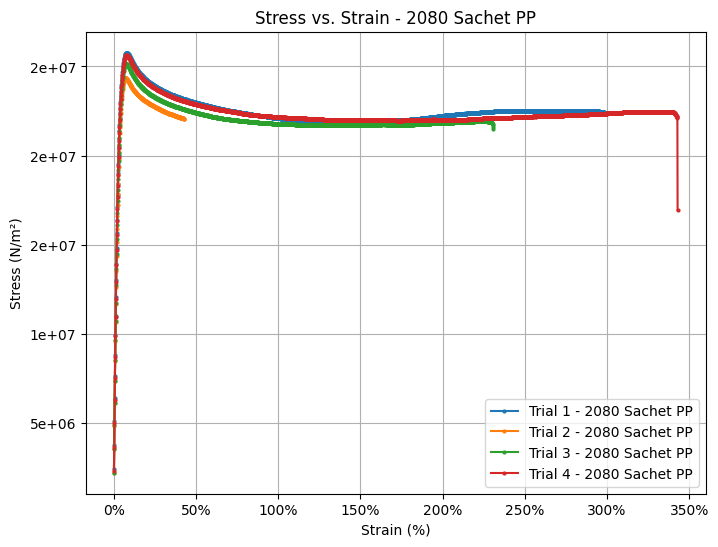

Trial 1 - 1090 Sachet PP: Columns 1 and 2
Trial 2 - 1090 Sachet PP: Columns 6 and 7
Trial 3 - 1090 Sachet PP: Columns 11 and 12
Trial 4 - 1090 Sachet PP: Columns 16 and 17


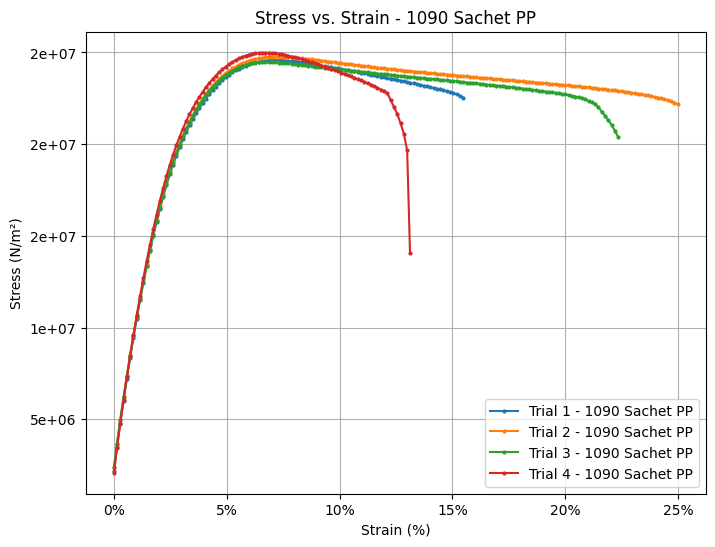

Trial 1 - PP Control: Columns 1 and 2
Trial 2 - PP Control: Columns 6 and 7
Trial 3 - PP Control: Columns 11 and 12
Trial 4 - PP Control: Columns 16 and 17


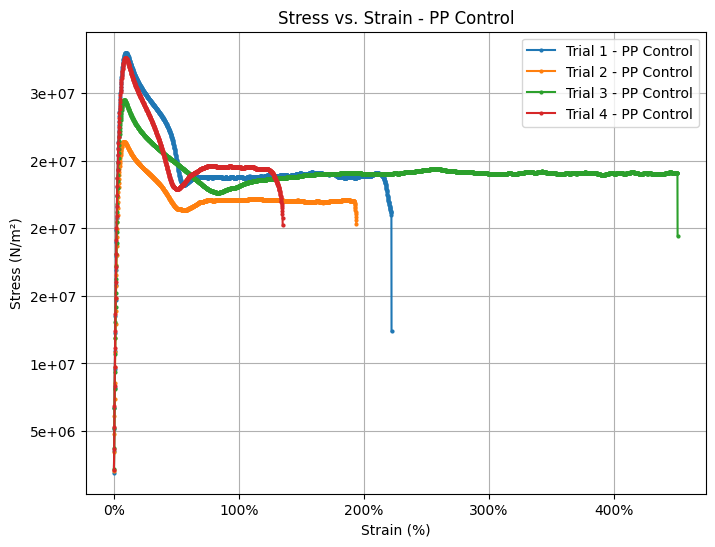

In [3]:
trial_number = 4  #The number of trials for each ratio of materials**************************************************************

for sheet in sheets:
    plt.figure(figsize=(8, 6))  #Creates a new figure for the plot

    # Iterate over every 5th column and the one next to it, starting from column 2
    for i in range(1, 1 + trial_number * 5, 5):
        displacement_col = i
        force_col = i + 1

        process_and_plot_data(sheet, displacement_col, force_col, (i // 5) + 1, f"Trial {(i // 5) + 1} - {sheet}")

    # Add labels, title, and legend for Virgin Plastic
    plt.title(f"Stress vs. Strain - {sheet}")
    plt.xlabel("Strain (%)")
    plt.ylabel("Stress (Pa)")
    plt.legend()

    # Format the axes
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))  #Uses an in-line function to format the x-axis as percentages (no decimals)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:0.0e}'.format(y)))  #Uses an in-line function to format the y-axis in scientific notation

    plt.grid(True)

    #Showing the graph (with the combined plots of all trials)
    plt.show()

****************************************************************************************************************************************************************************************************

In [4]:
def process_data(sheet_name, displacement_col, force_col, run_number, label, max_stress_list):
    # Read the Excel file
    df = pd.read_excel("PT Ventures Spring 2024 - Tensile Data.xlsx", sheet_name=sheet_name, header=2)

    # Extract displacement and force columns
    displacement_mm = df.iloc[:, displacement_col]  # displacement in mm
    force_kN = df.iloc[:, force_col]  # force in kN

    # Convert units to meters
    displacement = displacement_mm / 1000  # convert mm to meters
    force = force_kN * 1000  # convert kN to N

    # Calculate stress and strain
    stress = calculate_stress(force, area)

    # Find the highest stress for each run
    max_stress = max(stress)
    max_stress_list.append(max_stress)

    print(f"{label}: Columns {displacement_col} and {force_col}")
    print(f"Maximum Stress: {max_stress:.2e} Pa\n")

In [7]:
trial_number = 4  #The number of trials for each ratio of materials**************************************************************
yield_points = []

for sheet in sheets:
    # Lists to store the maximum stress values for each run
    max_stresses = []

    # Iterate over every 5th column and the one next to it, starting from column 2
    for i in range(1, 1 + trial_number * 5, 5):
        displacement_col = i
        force_col = i + 1

        process_data(sheet, displacement_col, force_col, i // 5 + 1, f'Trial {i // 5 + 1} - {sheet}', max_stresses)

    # Calculate and print the average maximum stress
    max_stress_average = sum(max_stresses) / len(max_stresses)
    yield_points.append(max_stress_average)
    print(f"Average Maximum Stress - {sheet}: {max_stress_average:.2e} Pa\n\n")

print("Yield Points:")
for yield_point in yield_points:    
    print(yield_point)

Trial 1 - Sachet Control: Columns 1 and 2
Maximum Stress: 2.24e+07 N/m²

Trial 2 - Sachet Control: Columns 6 and 7
Maximum Stress: 2.30e+07 N/m²

Trial 3 - Sachet Control: Columns 11 and 12
Maximum Stress: 2.39e+07 N/m²

Trial 4 - Sachet Control: Columns 16 and 17
Maximum Stress: 2.51e+07 N/m²

Average Maximum Stress - Sachet Control: 2.36e+07 N/m²


Trial 1 - 5050 Sachet PP: Columns 1 and 2
Maximum Stress: 2.42e+07 N/m²

Trial 2 - 5050 Sachet PP: Columns 6 and 7
Maximum Stress: 2.41e+07 N/m²

Trial 3 - 5050 Sachet PP: Columns 11 and 12
Maximum Stress: 2.47e+07 N/m²

Trial 4 - 5050 Sachet PP: Columns 16 and 17
Maximum Stress: 2.48e+07 N/m²

Average Maximum Stress - 5050 Sachet PP: 2.45e+07 N/m²


Trial 1 - 4060 Sachet PP: Columns 1 and 2
Maximum Stress: 2.22e+07 N/m²

Trial 2 - 4060 Sachet PP: Columns 6 and 7
Maximum Stress: 2.12e+07 N/m²

Trial 3 - 4060 Sachet PP: Columns 11 and 12
Maximum Stress: 2.15e+07 N/m²

Trial 4 - 4060 Sachet PP: Columns 16 and 17
Maximum Stress: 2.20e+07 N/m²